# Visualizing Data¶
    1. Is there a linear relationship between salary and rating
    2. Locations of companies and their rating
    3. mean,median,sdv of salary
    4. Finding popular describtion words

In [9]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("CleanedFinal.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Unnamed: 0,Title,Location,Company,Salary,Describtion,Rating,long,lat
0,0,Engineer Intern (35 Hour) (Target Class - Air ...,"Hartford, Ct 06106 (Downtown Area)",State of Connecticut - Department of Energy & ...,55625.0,General knowledge of basic engineering theorie...,4.0,-72.677202,41.765571
1,1,Engineer Intern (35 Hour) (Land & Water Resour...,"Hartford, Ct 06106 (Downtown Area)",State of Connecticut - Department of Energy & ...,55625.0,General knowledge of basic engineering theorie...,4.0,-72.677202,41.765571
2,2,Undergraduate Internship/Co-op Program - Multi...,"Washington, Dc",Central Intelligence Agency,44279.0,"As an Undergraduate Intern, you are expected t...",4.3,-77.036871,38.907192
3,3,Enterprise Infrastructure Engineer,"Middlebury, Vt",Middlebury College,61216.0,"Furthermore, the engineer proactively monitors...",4.0,-73.167340,44.015337
4,4,Enterprise Infrastructure Engineer,"Middlebury, Vt",Middlebury College,61216.0,"Student workers, interns, and representatives ...",4.0,-73.167340,44.015337


# 1.  Finding Popular Keywords from the Describtion 

#### I followed this tutorial on creating Keyword maps: https://www.datacamp.com/community/tutorials/wordcloud-python
#https://www.displayr.com/alternatives-word-cloud/

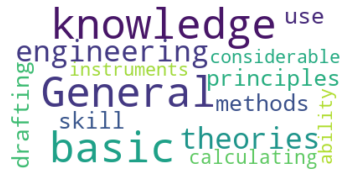

In [10]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Start with one review:
text = data.Describtion[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')#make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [12]:
text = " ".join(review for review in data.Describtion)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4731 words in the combination of all review.


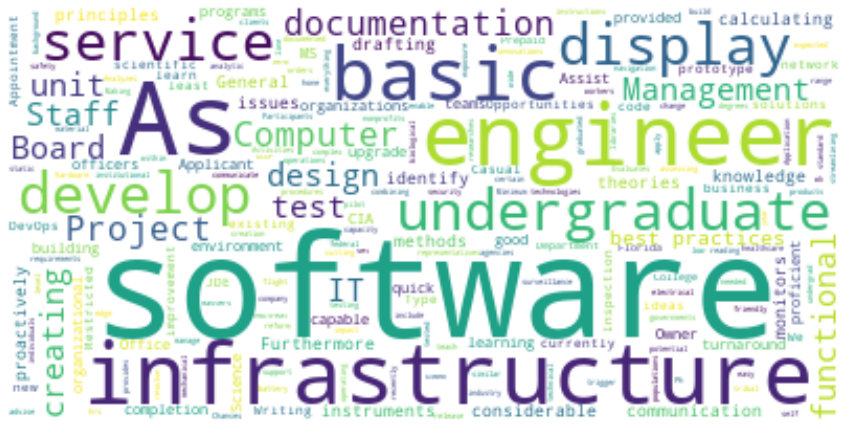

In [13]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["this",'full','time','junior','ability','position','responsible','for','As',
                  'use','engineering','development', 'assist','student', 'week', 
                  'the', 'seeking',"intern",'program',',','.','you will',
                  'full time' ,'will','work', 'hours', 'must',"is",'the', "required",
                  "for","start",'experience','various','intern','skill','the CIA','CIA','you','alongside'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2. Is there a correlation between Salary & Rating?

In [38]:
import plotly.express as px
data2= pd.concat([data['Salary'], data['Rating']],axis=1, keys=['Salary', 'Rating'])
fig = px.parallel_categories(data2, color="Salary", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [47]:
#df = px.data.gapminder()
fig = px.area(data, x="Salary", y="Rating", color="Location", line_group="Location")
fig.show()

from urllib.request import urlopen
import json
#with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    #counties = json.load(response)

#import pandas as pd
#df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   #dtype={"fips": str})
countries=pd.read_json('dataset2.json')
import plotly.express as px

fig = px.choropleth_mapbox(data, geojson=counties, locations='Location', color='Salary',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           #labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [51]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="winner",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

from urllib.request import urlopen
import json
with open('dataset2.json') as response:
    counties = json.load(response)

counties["features"][0]

import json

# read file
with open('dataset2.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

# show values
print("usd: " + str(obj['Salary']))
#print("eur: " + str(obj['Location']))
#print("gbp: " + str(obj['Rating']))

with open('dataset.js', 'r') as f:
    distros_dict = json.load(f)

for distro in distros_dict:
    print(distro['Salary'])

import json 

test='''
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.0,
        "Salary": 55625.0,
        "Location": "Hartford, Ct 06106 (Downtown Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -72.6772016,
          41.7655714
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.0,
        "Salary": 55625.0,
        "Location": "Hartford, Ct 06106 (Downtown Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -72.6772016,
          41.7655714
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.3,
        "Salary": 44279.0,
        "Location": "Washington, Dc"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -77.0368707,
          38.9071923
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.0,
        "Salary": 61216.0,
        "Location": "Middlebury, Vt"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.16734,
          44.0153371
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.0,
        "Salary": 61216.0,
        "Location": "Middlebury, Vt"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -73.16734,
          44.0153371
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.8,
        "Salary": 31200.0,
        "Location": "Fredericksburg, Va 22408"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -77.4605399,
          38.3031837
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.5,
        "Salary": 15600.0,
        "Location": "Pittsburgh, Pa"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -79.9958864,
          40.44062479999999
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.5,
        "Salary": 15600.0,
        "Location": "Pittsburgh, Pa"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -79.9958864,
          40.44062479999999
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.3,
        "Salary": 46633.60000000001,
        "Location": "Washington, Dc"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -77.0368707,
          38.9071923
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.3,
        "Salary": 37440.0,
        "Location": "Chicago, Il"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -87.6297982,
          41.8781136
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.0,
        "Salary": 24960.0,
        "Location": "College Park, Md 20740"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -76.9354979,
          39.0026879
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.2,
        "Salary": 41600.0,
        "Location": "Melbourne, Fl 32934"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -80.7103532,
          28.1356631
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.0,
        "Salary": 24960.0,
        "Location": "College Park, Md 20740"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -76.9354979,
          39.0026879
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.4,
        "Salary": 35360.0,
        "Location": "Vista, Ca 92081"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -117.2534184,
          33.1778834
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.3,
        "Salary": 37440.0,
        "Location": "Chicago, Il"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -87.6297982,
          41.8781136
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.6,
        "Salary": 24960.0,
        "Location": "Brookfield, Wi 53005"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -88.099845,
          43.0717382
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.2,
        "Salary": 41600.0,
        "Location": "Melbourne, Fl 32934"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -80.7103532,
          28.1356631
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.1,
        "Salary": 41600.0,
        "Location": "Dayton, Oh"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -84.1916069,
          39.7589478
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.1,
        "Salary": 41600.0,
        "Location": "Oakland, Ca 94607 (Acorn-Acorn Industrial Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -122.2873638,
          37.8012895
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.1,
        "Salary": 41600.0,
        "Location": "Oakland, Ca 94607 (Acorn-Acorn Industrial Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -122.2873638,
          37.8012895
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.1,
        "Salary": 41600.0,
        "Location": "Oakland, Ca 94607 (Acorn-Acorn Industrial Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -122.2873638,
          37.8012895
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.1,
        "Salary": 41600.0,
        "Location": "Oakland, Ca 94607 (Acorn-Acorn Industrial Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -122.2873638,
          37.8012895
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.7,
        "Salary": 31200.0,
        "Location": "Cary, Nc"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -78.7811169,
          35.79154
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.3,
        "Salary": 41600.0,
        "Location": "Chicago, Il 60603 (The Loop Area)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -87.63116199999999,
          41.8792487
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.1,
        "Salary": 31200.0,
        "Location": "Farmington Hills, Mi 48331"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -83.41098339999999,
          42.508645
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.1,
        "Salary": 36961.6,
        "Location": "Downey, Ca"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -118.1331593,
          33.9401088
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 2.9,
        "Salary": 22880.0,
        "Location": "Columbia, Sc 29223"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -80.92077370000001,
          34.1058378
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.3,
        "Salary": 46633.60000000001,
        "Location": "Washington, Dc"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -77.0368707,
          38.9071923
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.5,
        "Salary": 31200.0,
        "Location": "Phoenix, Az"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -112.0740373,
          33.4483771
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 3.1,
        "Salary": 31200.0,
        "Location": "Farmington Hills, Mi 48331"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -83.41098339999999,
          42.508645
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "Rating": 4.5,
        "Salary": 31200.0,
        "Location": "Tallahassee, Fl"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -84.28073289999999,
          30.4382559
        ]
      }
    }
  ]
};
'''
data =json.loads(test)

In [ ]:
addrsfile = 
open("C:\\Users\file.json", 
"r")
addrJson = json.loads(addrsfile.read())
addrsfile.close()
if addrJson:
    print("yes")

In [69]:
import json

json_data=json.load(open('dataset2.json'))
print(type(data))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)